## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/Span_Level/DS_SpanLev_1e4_50_211229.csv")
data.head()

,Rs(GBu),NumCh,BCh(GHz),Lspan(KM),Ptx(dBm),CutNumCh,ChDistCutCen,TotCongLSP(%),RHEffecIdle,LHEffecIdle,RHCongLSP(%),RFirstIdle,LHCongLSP(%),LFirstIdle,PowNli(dB),PowAse(dB),SnrLink(dB)
0,64,59,64000000.0,50,-2.0,42,12,50.847,8,5,58.824,1,46.341,3,-75.067,-63.842,31.526
1,96,45,96000000.0,75,-1.5,5,18,51.111,7,2,50.000,2,50.000,1,-76.309,-56.163,24.621
2,96,45,96000000.0,90,4.5,11,12,51.111,8,3,55.882,0,30.000,4,-57.731,-52.710,26.022
3,32,117,32000000.0,120,2.5,78,19,51.282,13,11,53.846,0,49.351,3,-54.901,-50.640,21.757
4,64,59,64000000.0,65,0.0,56,26,52.542,1,8,33.333,0,52.727,2,-68.695,-60.254,29.673


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rs(GBu)        10000 non-null  int64  
 1   NumCh          10000 non-null  int64  
 2   BCh(GHz)       10000 non-null  float64
 3   Lspan(KM)      10000 non-null  int64  
 4   Ptx(dBm)       10000 non-null  float64
 5   CutNumCh       10000 non-null  int64  
 6   ChDistCutCen   10000 non-null  int64  
 7   TotCongLSP(%)  10000 non-null  float64
 8   RHEffecIdle    10000 non-null  int64  
 9   LHEffecIdle    10000 non-null  int64  
 10  RHCongLSP(%)   10000 non-null  float64
 11  RFirstIdle     10000 non-null  int64  
 12  LHCongLSP(%)   10000 non-null  float64
 13  LFirstIdle     10000 non-null  int64  
 14  PowNli(dB)     10000 non-null  float64
 15  PowAse(dB)     10000 non-null  float64
 16  SnrLink(dB)    10000 non-null  float64
dtypes: float64(8), int64(9)
memory usage: 1.3 MB


In [ ]:
data.describe()

,Rs(GBu),NumCh,BCh(GHz),Lspan(KM),Ptx(dBm),CutNumCh,ChDistCutCen,TotCongLSP(%),RHEffecIdle,LHEffecIdle,RHCongLSP(%),RFirstIdle,LHCongLSP(%),LFirstIdle,PowNli(dB),PowAse(dB),SnrLink(dB)
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,64.326400,73.377200,6.432640e+07,85.060500,0.000400,37.496700,18.369700,51.580608,6.999100,7.05970,49.841089,0.870000,50.077803,0.867200,-67.411279,-56.039749,24.377828
std,26.196314,31.147911,2.619631e+07,21.686537,3.020432,27.898409,13.814163,1.013510,3.613974,3.60106,13.965204,1.265172,13.638500,1.258063,9.752566,5.363002,4.666330
min,32.000000,45.000000,3.200000e+07,50.000000,-5.000000,1.000000,0.000000,50.427000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-87.354000,-66.852000,10.868000
25%,32.000000,45.000000,3.200000e+07,65.000000,-2.500000,17.000000,8.000000,50.847000,5.000000,5.00000,46.667000,0.000000,46.809000,0.000000,-75.399250,-60.254000,21.291750
50%,64.000000,59.000000,6.400000e+07,85.000000,0.000000,32.000000,16.000000,51.111000,7.000000,7.00000,50.000000,0.000000,50.000000,0.000000,-67.450000,-56.163000,24.681000
75%,96.000000,117.000000,9.600000e+07,105.000000,2.500000,49.000000,24.000000,52.542000,9.000000,9.00000,54.545000,1.000000,54.545000,1.000000,-59.433000,-51.778000,27.978250
max,96.000000,117.000000,9.600000e+07,120.000000,5.000000,117.000000,58.000000,53.333000,19.000000,19.00000,100.000000,11.000000,100.000000,15.000000,-46.343000,-45.869000,33.253000


## Data Analysis

In [ ]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Rs(GBu)', 'NumCh', 'BCh(GHz)', 'Lspan(KM)', 'Ptx(dBm)', 'CutNumCh',
       'ChDistCutCen', 'TotCongLSP(%)', 'RHEffecIdle', 'LHEffecIdle',
       'RHCongLSP(%)', 'RFirstIdle', 'LHCongLSP(%)', 'LFirstIdle',
       'PowNli(dB)', 'PowAse(dB)', 'SnrLink(dB)'],
      dtype='object')


## Data Visualization

In [ ]:
data.hist(bins=50, figsize=(20,15)) # to plot histogram of all columns in the dataset

* 12 categories of districts

* Most districts are located less than 2, while the smallest part is 12

### Outlier detection

In [ ]:
for column in data.columns:
    if data[column].dtype == np.float64:
        plt.figure(figsize = (20, 3))
        ax = sns.boxplot(x = data[column])

In [4]:
clean_data = data   # data set doesn't need cleaning

In [5]:
X = clean_data.iloc[:,:-1]
y = clean_data.iloc[:,-1]

## Data Preprocessing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Pipeline

In [7]:
numerical_columns = list(X_train)
categorical_columns = ["RHEffecIdle"] # based on trial and error and also histograms this column can be considered as a categorical feature

In [8]:
# creating a pipieline for numerical features which normalizes all the 
# given features as well as filling some missing data (which is not really necessary here)
numerical_pipeline = Pipeline([                     
        ('data_filler', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
# implementing all the changes by 'fit_transform'
X_train_numerical = numerical_pipeline.fit_transform(X_train)

In [9]:
# the same is done for categorical data by ignoring the unknown elements while categorizing
pipeline = ColumnTransformer([
        ("numerical", numerical_pipeline, numerical_columns),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns),
    ])

## Models

In [10]:
# defining a function to print the evaluation metrics to avoid any duplicated line of code in the nest parts
def rmse_r2_mae(model,y,y_predict):    
    rmse = (np.sqrt(mean_squared_error(y, y_predict)))
    r2 = r2_score(y, y_predict)
    mae = mean_absolute_error(y,y_predict)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print('MAE score is {}'.format(mae))

In [11]:
# the same an previous part but with different inputs when predicted data is not accessible
def score_rmse_r2_mae(model,X,y):    
    rmse = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error').mean()
    r2 = cross_val_score(model, X, y, cv=10, scoring='r2').mean()
    mae = cross_val_score(model, X, y, cv=10, scoring='mean_absolute_error').mean()
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print('MAE score is {}'.format(mae))

In [12]:
# final evaluation and plotting hist for the difference between predicted and real labels
from matplotlib.ticker import PercentFormatter
def get_predict(model,X_train,y_train,X_test,y_test):
    print("\nThe model performance for training set")
    print("--------------------------------------")
    y_predict = model.predict(X_train)
    rmse_r2_mae(model,y_train,y_predict)
    print("\nThe model performance for testing set")
    print("--------------------------------------")
    y_predict = model.predict(X_test)
    rmse_r2_mae(model,y_test,y_predict)
    diff = (y_test - y_predict)
    #diff.hist(bins = 40)
    plt.hist(diff, bins = 25,weights=np.ones(len(diff)) / len(diff))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #plt.show()
    plt.title('Histogram of prediction errors')
    plt.xlabel('MPG prediction error')
    plt.ylabel('Frequency')

In [13]:
def get_score_predict(model,X_train,y_train,X_test,y_test):
    print("\nThe model performance for training set")
    print("--------------------------------------")
    score_rmse_r2_mae(model,X_train,y_train)
    print("\nThe model performance for validation set")
    print("--------------------------------------")
    score_rmse_r2_mae(model,X_test,y_test)

In [14]:
def test_score(model,X,y):
    print("\nThe model performance for testing set")
    print("--------------------------------------")
    score_rmse_r2_mae(model,X,y)

In [15]:
def get_model_grid_search(model, parameters, X, y, pipeline):
    
    X = pipeline.fit_transform(X)    
    # definng R2 as scoring method
    random_search = RandomizedSearchCV(model,
                            param_distributions=parameters,
                            scoring='r2',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
    
    grid_result = random_search.fit(X, y)
    
    print('Best R2: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)  
  
    # definng MAE as scoring method
    random_search2 = RandomizedSearchCV(model,
                            param_distributions=parameters,
                            scoring='neg_mean_absolute_error',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
    
    grid_result2 = random_search2.fit(X, y)
    
    print('Best MAE: ', grid_result2.best_score_)
    print('Best Params: ', grid_result2.best_params_) 
  
    # definng RMSE as scoring method
    random_search3 = RandomizedSearchCV(model,
                            param_distributions=parameters,
                            scoring='neg_root_mean_squared_error',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
    
    grid_result3 = random_search3.fit(X, y)
    
    print('Best RMSE: ', grid_result3.best_score_)
    print('Best Params: ', grid_result3.best_params_) 
    
    return random_search.best_estimator_

In [16]:
def get_model_random_search(model, parameters, X, y, pipeline):
    
    X = pipeline.fit_transform(X)    
    clf = GridSearchCV(model, parameters, scoring='r2',cv=10,verbose=1, n_jobs=-1)
    grid_result = clf.fit(X, y)
      
    # definng R2 as scoring method
    print('Best R2: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_) 
  
    # definng MAE as scoring method
    clf2 = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error',cv=10,verbose=1, n_jobs=-1)
    grid_result2 = clf2.fit(X, y)

    print('Best MAE: ', grid_result2.best_score_)
    print('Best Params: ', grid_result2.best_params_)
  
    # definng RMSE as scoring method
    clf3 = GridSearchCV(model, parameters, scoring='neg_root_mean_squared_error',cv=10,verbose=1, n_jobs=-1)
    grid_result3 = clf3.fit(X, y)

    print('Best MSAE: ', grid_result3.best_score_)
    print('Best Params: ', grid_result3.best_params_)
    
    return clf.best_estimator_

In [17]:
# running 10 fold cross validation for evaluation of the input model and returning the mean of all 10 scores 
def k_fold_score(model, X ,y):
    kf = KFold(n_splits = 10)
    rmse_list = []
    r2_list = []
    mae_list = []
    for train_index, test_index in kf.split(X, y):
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]

        X_train = pipeline.fit_transform(X_train)
        X_test = pipeline.transform(X_test)
        
        model.fit(X_train,y_train)
        y_predict = model.predict(X_test)

        rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
        r2 = r2_score(y_test, y_predict)
        mae = mean_absolute_error(y_test,y_predict)

        rmse_list.append(rmse)
        r2_list.append(r2)
        mae_list.append(mae)


    rmse_list = np.array(rmse_list)
    r2_list = np.array(r2_list)
    mae_list = np.array(mae_list)

    print("--------------------------------------")
    print('RMSE is {}'.format(rmse_list.mean()))
    print('R2 score is {}'.format(r2_list.mean()))
    print('MAE score is {}'.format(mae_list.mean()))

In [18]:
# translating dataset as defined in the pipeline
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [19]:
# seperating the data set to be used in grid search and cross validation
data_gs, data_cv, target_gs, target_cv = train_test_split(X, y, test_size=0.95, random_state=42)

### LinearRegression

### Cross Validation


The model performance for training set
--------------------------------------
RMSE is 1.8406440524613408
R2 score is 0.8459335740915573
MAE score is 1.37154352825972

The model performance for testing set
--------------------------------------
RMSE is 1.8031524314000584
R2 score is 0.8442903378589373
MAE score is 1.333618957614806


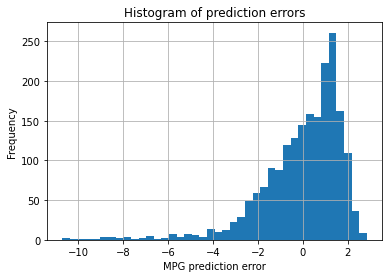

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
get_predict(lin_model,X_train,y_train,X_test,y_test)

### random Search

**Elastic-Net Regression**

Elastic-net is a linear regression model that combines the penalties of Lasso and Ridge.

In [ ]:
# indicating the potential parameters to be used in trial and error 
params = {
    'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],       
    'l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

en = ElasticNet()

pipeline = ColumnTransformer([
        ("numerical", numerical_pipeline, numerical_columns),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns),
    ])
# calling random search for elastic net 
en_model = get_model_random_search(en, params, data_gs, target_gs, pipeline)

Fitting 10 folds for each of 77 candidates, totalling 770 fits
Best R2:  0.8424886379654106
Best Params:  {'alpha': 0.1, 'l1_ratio': 1}
Fitting 10 folds for each of 77 candidates, totalling 770 fits
Best MAE:  -1.3502965110395042
Best Params:  {'alpha': 0.01, 'l1_ratio': 1}
Fitting 10 folds for each of 77 candidates, totalling 770 fits
Best MSAE:  -1.841129702786808
Best Params:  {'alpha': 0.1, 'l1_ratio': 1}


### K Fold

In [ ]:
k_fold_score(en_model,data_cv, target_cv) # on training data (80%) using 10_fold cross validation of elastic net algorithm

--------------------------------------
RMSE is 1.862396231736728
R2 score is 0.8401585349084387
MAE score is 1.4077414216916093


## Support Vector Machine Regressor

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


The model performance for training set
--------------------------------------
RMSE is 0.07073393219499743
R2 score is 0.9997724776904319
MAE score is 0.06188610246109416

The model performance for testing set
--------------------------------------
RMSE is 0.16731486070331525
R2 score is 0.9986593367303713
MAE score is 0.09420023509446065


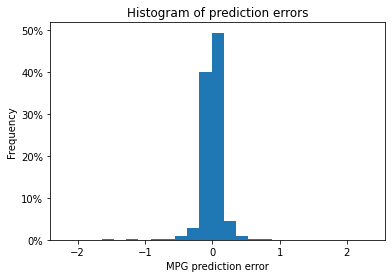

In [23]:
svr = SVR(kernel='rbf',C=100) #C = 150, epsilon= 0.00005, gamma= 0.005)
svr.fit(X_train, y_train)
get_predict(svr,X_train,y_train,X_test,y_test)

In [23]:
y_train.max(), y_train.min(), y_train.mean()

(33.253, 10.868, 24.409525124999973)

### Random Search

In [24]:
# doing the same thing as elastic net for SVR
params = {  'C': [0.1, 1, 10, 100],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

svr = SVR(kernel='rbf')

pipeline = ColumnTransformer([
        ("numerical", numerical_pipeline, numerical_columns),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), categorical_columns),
    ])

svr_rs_model = get_model_random_search(svr, params, data_gs, target_gs, pipeline)

Fitting 10 folds for each of 308 candidates, totalling 3080 fits
Best R2:  0.9788444448076596
Best Params:  {'C': 100, 'epsilon': 0.5, 'gamma': 0.005}
Fitting 10 folds for each of 308 candidates, totalling 3080 fits
Best MAE:  -0.4547597474549108
Best Params:  {'C': 100, 'epsilon': 0.005, 'gamma': 0.005}
Fitting 10 folds for each of 308 candidates, totalling 3080 fits
Best MSAE:  -0.6774943751877242
Best Params:  {'C': 100, 'epsilon': 0.5, 'gamma': 0.005}


In [21]:
k_fold_score(svr, X_train, y_train)

AttributeError: ignored

# **Result:**

# ***linear reg:***


*   The model performance for training set
    --------------------------------------
    RMSE is 1.8406440524613408\
    R2 score is 0.8459335740915573\
    MAE score is 1.37154352825972




*    The model performance for testing set
    --------------------------------------
    RMSE is 1.8031524314000584\
    R2 score is 0.8442903378589373\
    MAE score is 1.333618957614806

#    ***Elastic net*** :

*    Best R2:  0.8424886379654106
    
*    Best MAE:  1.3502965110395042
    
*    Best MSAE:  1.841129702786808

*    Best Params:  alpha: 0.1, l1_ratio: 1

# ***SVR***

*   The model performance for training set
    --------------------------------------
    RMSE is 0.2488812643948367\
    R2 score is 0.9971832208788407\
    MAE score is 0.14058093534326982

*    The model performance for testing set
    --------------------------------------
    RMSE is 0.30315675650110846\
    R2 score is 0.9955986573274681\
    MAE score is 0.16715031899685914
#    random search:
*   Best R2:  0.9934061443981413
*Best MAE:  0.2709478856261804
*Best MSAE:  0.3758950035569143
*Best Params:  C: 1000, 'epsilon': 0.05, 'gamma': 0.005

